In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"duylong02","key":"e56cb85c9acb3d3197e2d23d603c06a3"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!cmod 600 ~/.kaggle/kaggle.json

/bin/bash: line 1: cmod: command not found


In [ ]:
!pip install kaggle

In [ ]:
pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

print("Path to dataset files:", path)

100%|██████████| 64.4M/64.4M [00:00<00:00, 84.3MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4


In [ ]:
from google.colab import files
files.view('/root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4')

<IPython.core.display.Javascript object>

In [ ]:
!ls /root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4/train/cats | wc -l  # Số ảnh mèo trong train
!ls /root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4/train/dogs | wc -l  # Số ảnh chó trong train
!ls /root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4/test/cats | wc -l   # Số ảnh mèo trong test
!ls /root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4/test/dogs | wc -l   # Số ảnh chó trong test

279
278
70
70


In [ ]:
import os
import shutil
base_path = "/root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4/train/"

In [ ]:
import os
import shutil
base_path = "/root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4/train/"
cats = [f for f in os.listdir(base_path + "cats/") if f.endswith('.jpg')][:200]
dogs = [f for f in os.listdir(base_path + "dogs/") if f.endswith('.jpg')][:200]

# Tạo thư mục mới
os.makedirs("/content/dataset/train/cats", exist_ok=True)
os.makedirs("/content/dataset/train/dogs", exist_ok=True)
os.makedirs("/content/dataset/test/cats", exist_ok=True)
os.makedirs("/content/dataset/test/dogs", exist_ok=True)

# Chia: 180 train, 20 test mỗi class
for cat in cats[:180]:
    shutil.copy(base_path + "cats/" + cat, "/content/dataset/train/cats/")
for cat in cats[180:200]:
    shutil.copy(base_path + "cats/" + cat, "/content/dataset/test/cats/")
for dog in dogs[:180]:
    shutil.copy(base_path + "dogs/" + dog, "/content/dataset/train/dogs/")
for dog in dogs[180:200]:
    shutil.copy(base_path + "dogs/" + dog, "/content/dataset/test/dogs/")

print("Train cats:", len(os.listdir("/content/dataset/train/cats")))
print("Train dogs:", len(os.listdir("/content/dataset/train/dogs")))
print("Test cats:", len(os.listdir("/content/dataset/test/cats")))
print("Test dogs:", len(os.listdir("/content/dataset/test/dogs")))

Train cats: 180
Train dogs: 180
Test cats: 20
Test dogs: 20


In [ ]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import kagglehub
import os
import shutil
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")
print("Path to dataset files:", path)

base_path = "/root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4/train/"

cats = [f for f in os.listdir(base_path + "cats/") if f.endswith('.jpg')][:200]
dogs = [f for f in os.listdir(base_path + "dogs/") if f.endswith('.jpg')][:200]

for split in ["train", "val", "test"]:
    os.makedirs(f"/content/dataset/{split}/cats", exist_ok=True)
    os.makedirs(f"/content/dataset/{split}/dogs", exist_ok=True)

# Chia: 140 train, 40 val, 20 test mỗi class
for cat in cats[:140]:
    shutil.copy(base_path + "cats/" + cat, "/content/dataset/train/cats/")
for cat in cats[140:180]:
    shutil.copy(base_path + "cats/" + cat, "/content/dataset/val/cats/")
for cat in cats[180:200]:
    shutil.copy(base_path + "cats/" + cat, "/content/dataset/test/cats/")
for dog in dogs[:140]:
    shutil.copy(base_path + "dogs/" + dog, "/content/dataset/train/dogs/")
for dog in dogs[140:180]:
    shutil.copy(base_path + "dogs/" + dog, "/content/dataset/val/dogs/")
for dog in dogs[180:200]:
    shutil.copy(base_path + "dogs/" + dog, "/content/dataset/test/dogs/")

# Augment tập train lên 400 ảnh mỗi class
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

X_train = []
y_train = []
base_path_train = "/content/dataset/train/"
for folder, label in [("cats/", 0), ("dogs/", 1)]:
    images = os.listdir(base_path_train + folder)
    num_orig = len(images)
    num_needed = 400 - num_orig
    for img_name in images:
        img = cv2.imread(base_path_train + folder + img_name)
        if img is not None:
            img = cv2.resize(img, (227, 227)) / 255.0
            X_train.append(img)
            y_train.append(label)
            img_batch = img[np.newaxis, ...]
            aug_iter = datagen.flow(img_batch, batch_size=1)
            aug_count = num_needed // num_orig
            for _ in range(aug_count + 1):
                aug_img = next(aug_iter)[0]
                X_train.append(aug_img)
                y_train.append(label)

X_train_cats = [x for x, y in zip(X_train, y_train) if y == 0][:400]
y_train_cats = [0] * 400
X_train_dogs = [x for x, y in zip(X_train, y_train) if y == 1][:400]
y_train_dogs = [1] * 400
X_train = np.array(X_train_cats + X_train_dogs)
y_train = np.array(y_train_cats + y_train_dogs)
y_train = np.eye(2)[y_train]

print("Train shape:", X_train.shape)  # (800, 227, 227, 3)
print("y_train shape:", y_train.shape)  # (800, 2)

# Load tập val
X_val = []
y_val = []
base_path_val = "/content/dataset/val/"
for folder, label in [("cats/", 0), ("dogs/", 1)]:
    images = os.listdir(base_path_val + folder)
    for img_name in images:
        img = cv2.imread(base_path_val + folder + img_name)
        if img is not None:
            img = cv2.resize(img, (227, 227)) / 255.0
            X_val.append(img)
            y_val.append(label)
X_val = np.array(X_val)
y_val = np.eye(2)[y_val]
print("Val shape:", X_val.shape)

X_test = []
y_test = []
base_path_test = "/content/dataset/test/"
for folder, label in [("cats/", 0), ("dogs/", 1)]:
    images = os.listdir(base_path_test + folder)
    num_orig = len(images)
    num_needed = 200 - num_orig
    for img_name in images:
        img = cv2.imread(base_path_test + folder + img_name)
        if img is not None:
            img = cv2.resize(img, (227, 227)) / 255.0
            X_test.append(img)
            y_test.append(label)
            img_batch = img[np.newaxis, ...]
            aug_iter = datagen.flow(img_batch, batch_size=1)
            aug_count = num_needed // num_orig
            for _ in range(aug_count):
                aug_img = next(aug_iter)[0]
                X_test.append(aug_img)
                y_test.append(label)

# Cắt bớt để đúng 200 ảnh mỗi class
X_test_cats = [x for x, y in zip(X_test, y_test) if y == 0][:200]
y_test_cats = [0] * 200
X_test_dogs = [x for x, y in zip(X_test, y_test) if y == 1][:200]
y_test_dogs = [1] * 200
X_test = np.array(X_test_cats + X_test_dogs)
y_test = np.array(y_test_cats + y_test_dogs)
y_test = np.eye(2)[y_test]

print("Test shape:", X_test.shape)  # (400, 227, 227, 3)
print("Total images:", len(X_train) + len(X_val) + len(X_test))  # 1280 (có thể cắt bớt nếu cần đúng 1200)

Path to dataset files: /root/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4
Train shape: (800, 227, 227, 3)
y_train shape: (800, 2)
Val shape: (80, 227, 227, 3)
Test shape: (400, 227, 227, 3)
Total images: 1280


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 158s 6s/step - accuracy: 0.5083 - loss: 1.0227 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 203s 6s/step - accuracy: 0.4999 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 207s 6s/step - accuracy: 0.5142 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 196s 6s/step - accuracy: 0.5016 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 200s 6s/step - accuracy: 0.4537 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6932


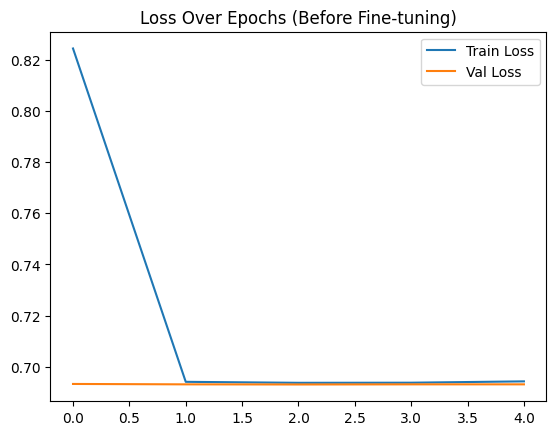

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input

model = Sequential([
    Input(shape=(227, 227, 3)),
    Conv2D(96, (11, 11), strides=4, activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(256, (5, 5), activation='relu', padding='same'),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((3, 3), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện với tập val
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Vẽ đồ thị loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs (Before Fine-tuning)')
plt.show()

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# Tải AlexNet pre-trained
alexnet = models.alexnet(pretrained=True)
print(alexnet)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 152MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
import torch.nn as nn
alexnet.classifier[6] = nn.Linear(4096, 2)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Chuyển sang tensor (HWC -> CHW cho PyTorch)
X_train_tensor = torch.tensor(X_train.transpose(0, 3, 1, 2), dtype=torch.float32)
y_train_tensor = torch.tensor(np.argmax(y_train, axis=1), dtype=torch.long)
X_val_tensor = torch.tensor(X_val.transpose(0, 3, 1, 2), dtype=torch.float32)
y_val_tensor = torch.tensor(np.argmax(y_val, axis=1), dtype=torch.long)
X_test_tensor = torch.tensor(X_test.transpose(0, 3, 1, 2), dtype=torch.float32)
y_test_tensor = torch.tensor(np.argmax(y_test, axis=1), dtype=torch.long)

# Tạo DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Epoch 1, Train Loss: 0.9602249962091446, Val Loss: 0.49351706107457477
Epoch 2, Train Loss: 0.35502841472625735, Val Loss: 0.4261569678783417
Epoch 3, Train Loss: 0.16119718298316002, Val Loss: 0.5634064028660456
Epoch 4, Train Loss: 0.12525528956204654, Val Loss: 0.5829173227151235
Epoch 5, Train Loss: 0.10204706752672792, Val Loss: 0.9708339671293894


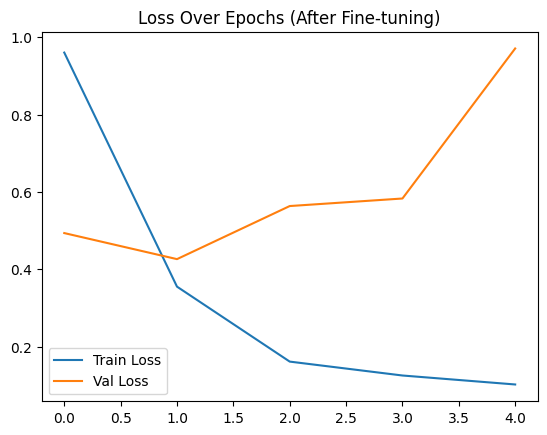

In [ ]:
import torch.nn as nn
from torchvision import models

alexnet = models.alexnet(pretrained=True)

# Thay lớp cuối từ 1000 class thành 2 class
alexnet.classifier[6] = nn.Linear(4096, 2)

# Đóng băng các lớp convolution (features)
for param in alexnet.features.parameters():
    param.requires_grad = False

optimizer = torch.optim.Adam(alexnet.classifier.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet = alexnet.to(device)

# Huấn luyện với tập val
train_losses = []
val_losses = []
for epoch in range(5):
    # Train
    alexnet.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation
    alexnet.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_loss = val_loss / len(val_loader)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Val Loss: {val_loss}")

# Vẽ đồ thị loss
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs (After Fine-tuning)')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

alexnet.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = alexnet(inputs)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.cpu().numpy())
        y_true.extend(labels.cpu().numpy())
accuracy = accuracy_score(y_true, y_pred)
f_score = f1_score(y_true, y_pred, average='weighted')
print("Accuracy sau fine-tuning:", accuracy)
print("F-score sau fine-tuning:", f_score)

Accuracy sau fine-tuning: 0.815
F-score sau fine-tuning: 0.8147035256410255
